In [46]:
# pip install tensorflow tensorflow-datasets

# Loading required packages and data

**1. Dataset**

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

**2. Split the data into x_train, y_train, x_test and y_test.**

**a. Display the sample images from x_train**

**b. Display the shape of x_train and y_train**

# Data splitting

In [81]:
# Load fashion_mnist dataset
# 2. splitting the data into test and train set
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

The Fashion MNIST dataset has 70,000 grayscale images. The class labels are:

Label Class

0 - T-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle boot

# Training and testing data shape

In [82]:
# 2 (b). Display dataset shape
print('Training data shape: ', x_train.shape)
print('Training labels shape: ', y_train.shape)
print('Testing data shape: ', x_test.shape)
print('Testing labels shape: ', y_test.shape)

Training data shape:  (60000, 28, 28)
Training labels shape:  (60000,)
Testing data shape:  (10000, 28, 28)
Testing labels shape:  (10000,)


In [83]:
print('Training labels: \n', y_train) # train_labels = y_train

Training labels: 
 [9 0 0 ... 3 0 5]


# Dataset display

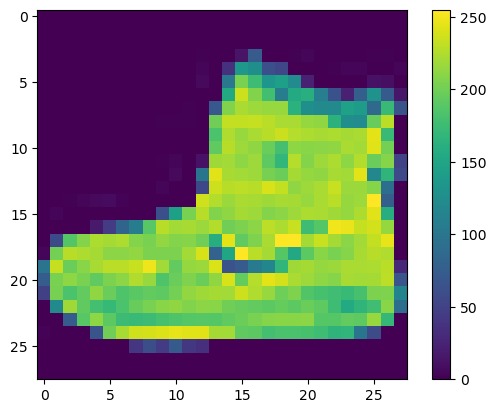

In [84]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.gca().grid(False)

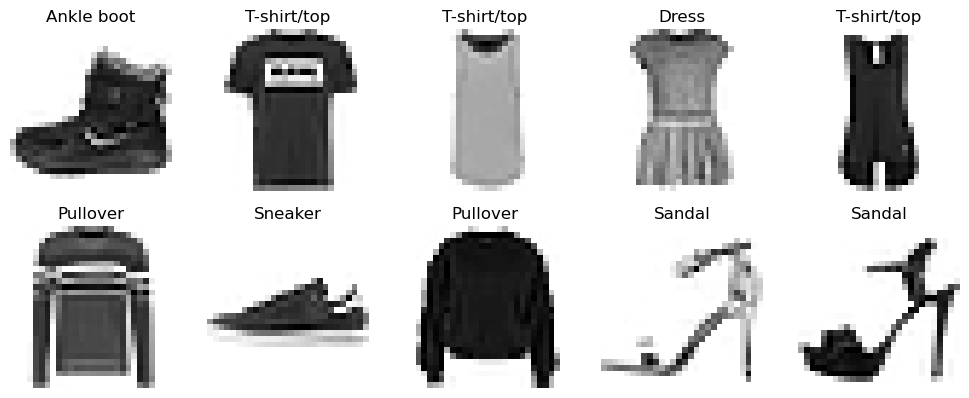

In [85]:
# Define class names for reference
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2 (a). Display the sample images from x_train
# Visualize a few samples from the dataset

# Number of digits to display
n = 10

# Create a figure to display the images
plt.figure(figsize=(10, 10))

# Loop through the first 'n' images
for i in range(n):
    
    # Create a subplot within the figure
    plt.subplot(5, 5, i + 1)
    
    # Display the original image using the variable 'X_train'
    
    # Display the image using the correct format (2D array)
    # display the images from the x_train dataset using a binary colormap.
    # The binary colormap is commonly used for grayscale images
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    
    # Display the corresponding label of the sample in the title of each subplot when visualizing the samples.
    # Since the labels are numerical values, converting them to strings using str() is necessary to display them as titles.
    
    # set the title of each subplot in the visualization loop    
    plt.title(class_names[y_train[i]])
    
    # Hide x-axis and y-axis labels and ticks
    
    # ax.get_xaxis().set_visible(False)
    # ax.get_yaxis().set_visible(False)
    
    plt.axis("off")
    
plt.tight_layout()

# Show the figure with the images
plt.show()

**3. Flatten the images**

**a. Reshape the images from 28x28 to 784-dimension vector.**

# Flattening the images

In [86]:
# Print the shapes of the original training data and labels
print("Previous x_train shape: {} \nPrevious y_train shape:{}".format(x_train.shape, y_train.shape))

# a. Reshape the images from 28x28 to 784-dimension vector.
# Reshape training and testing data to a flat format (flattening the images)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

Previous x_train shape: (60000, 28, 28) 
Previous y_train shape:(60000,)


**4. Scale the data**

**a. Convert the data into float 32 type**

**b. Scale the data by dividing x_train and y_train by 255**

**c. Display the shape of x_train and y_train after scaling.**

# Min-Max Scaling

In [87]:
# 4 (a). Convert the data type of the images to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 4 (b). Scale the data by dividing x_train and y_train by 255
# Normalize the pixel values to a range between 0 and 1  # Zero is for Black  #1 for White
x_train /= 255
x_test /= 255

In [88]:
# 4 (b). Scale the data by dividing x_train and y_train by 255
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

In [89]:
# c. Display the shape of x_train and y_train after scaling.

# Display dataset shapes
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)

Shape of x_train: (60000, 784)
Shape of x_test: (10000, 784)


# Processing the target variable

In [90]:
# One-hot encoding

# Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)
# Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=10)

In [91]:
# Number of classes in the dataset
classes = 10

# Convert the labels to one-hot encoded format
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

# Print the shapes of the preprocessed training data and labels
print("New x_train shape: {} \nNew y_train shape:{}".format(x_train.shape, y_train.shape))

New x_train shape: (60000, 784) 
New y_train shape:(60000, 10)


**5. Define the hyper parameters for the neural networks**

**a. Learning rate**

**b. No. of Epochs**

**c. Batch size**

**d. Input_size**

**e. Hidden layer1**

**f. Hidden layer2 (You can add more layer depending upon your observation. I have mentioned two layers only for example)**

**g. Output_size (output layers depending upon the number of classes)**

# Setting up Hyper-parameters

In [92]:
# 5 (a). Define the learning rate
learning_rate = 0.001

# 5 (b). No. of Epochs
# Set the number of complete passes through the dataset during training
epochs = 10

# 5 (c). Specify the number of data samples to process in each batch
batch_size = 200

# 5 (d). Define the input size for each data sample (e.g., image pixels)
input_size = 784

# 5 (e). Define the number of neurons in the first hidden layer
hidden1 = 400

# 5 (f). Define the number of neurons in the second hidden layer
hidden2 = 128

# Define the number of neurons in the third hidden layer
hidden3 = 64

# 5 (g). Output_size (output layers depending upon the number of classes)
# Define the total number of classes/categories in the dataset
classes = 10


**6. Define the structure of your neural network**

**a. No of hidden layers**

**b. Activation function for each layer neurons**

**c. Number of output layer neurons and activation function**

**d. Compile the model and provide following arguments**

    i. Loss function

    ii. Optimizer

    iii. Metric

**e. Display the summary of the model**

# Building the FCN Model

**FCN - Fully Connected Neural Network**

**optimizer = sgd**

In [95]:
# 6. Define the structure of your neural network

### Build the model ###

# Create a Sequential model, which allows us to build a neural network layer by layer
model = Sequential()

# Add the first hidden layer with 'hidden1' neurons, using ReLU activation function
# The 'input_dim' specifies the input size for this layer
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
# output = relu(dot(W, input) + bias)

# Add the second hidden layer with 'hidden2' neurons, also using ReLU activation function
model.add(Dense(hidden2, activation='relu'))

# Add the third hidden layer with 'hidden3' neurons, also using ReLU activation function
model.add(Dense(hidden3, activation='relu'))


# Add the output layer with 'classes' neurons, using softmax activation function
# Softmax activation ensures that the output values represent probabilities of each class
model.add(Dense(classes, activation='softmax'))

### Compilation ###

# Compile the model by specifying the loss function, optimizer, and evaluation metrics
# model.compile(loss='categorical_crossentropy',
#               metrics=['accuracy'], optimizer='adam')


# Compile the model with SGD optimizer and learning rate
# optimizer = SGD(learning_rate=learning_rate)
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display a summary of the model architecture, showing the layers and parameter counts
model.summary()

# Build a fully connected neural network model
# model = Sequential([
#     Flatten(input_shape=(28, 28)),
#     Dense(128, activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(10, activation='softmax')
# ])


# Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 400)               314000    
                                                                 
 dense_17 (Dense)            (None, 128)               51328     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 10)                650       
                                                                 
Total params: 374234 (1.43 MB)
Trainable params: 374234 (1.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**7. Train the Neural Network**

**a. Fit the Model**

# Training the Model

In [96]:
# Import necessary libraries
from time import time

# Record the current time to measure training time
tic = time()

# 7 (a). Fit the model on the training data
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# Record the time after model training
toc = time()

# Calculate and print the time taken for model training
print("Model training took {} secs".format(toc - tic))

Epoch 1/10
300/300 [==============================] - 3s 8ms/step - loss: 1.0793 - accuracy: 0.6087
Epoch 2/10
300/300 [==============================] - 2s 8ms/step - loss: 0.6263 - accuracy: 0.7695
Epoch 3/10
300/300 [==============================] - 2s 8ms/step - loss: 0.5547 - accuracy: 0.7993
Epoch 4/10
300/300 [==============================] - 2s 8ms/step - loss: 0.5135 - accuracy: 0.8157
Epoch 5/10
300/300 [==============================] - 2s 8ms/step - loss: 0.4863 - accuracy: 0.8250
Epoch 6/10
300/300 [==============================] - 2s 8ms/step - loss: 0.4619 - accuracy: 0.8344
Epoch 7/10
300/300 [==============================] - 2s 8ms/step - loss: 0.4420 - accuracy: 0.8409
Epoch 8/10
300/300 [==============================] - 2s 8ms/step - loss: 0.4251 - accuracy: 0.8463
Epoch 9/10
300/300 [==============================] - 2s 8ms/step - loss: 0.4107 - accuracy: 0.8516
Epoch 10/10
300/300 [==============================] - 2s 8ms/step - loss: 0.3993 - accuracy: 0.8546

**8. Test the model**

**a. Find the testing accuracy of the model**

**b. Compare the training and testing accuracy and write you observation in the comments**

**c. Display the predicted labels along the input image.**

# Testing the Model

In [97]:

# Testing the trained model

# Evaluate the model

# With verbose=2, the model.evaluate() function will display a progress bar with the test loss and accuracy during evaluation,
# but it won't display individual batch-level progress as it would with verbose=1.
# This is useful when you want to see the overall progress of the evaluation without the additional batch-level output.

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
# test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\nTest loss:", test_loss)

print("\nTest accuracy:", test_accuracy)


313/313 - 1s - loss: 0.4322 - accuracy: 0.8440 - 719ms/epoch - 2ms/step

Test loss: 0.43217411637306213

Test accuracy: 0.843999981880188


In [98]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(x_test, verbose=0)
# predictions = model.predict(test_images)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate the binary cross-entropy loss
test_loss = log_loss(y_test, y_pred_probs)
print("\nTest loss: {}".format(test_loss))

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, y_test)
print("\nTest accuracy: {}".format(test_accuracy))


Test loss: 0.4321742732430924

Test accuracy: 0.8139


In [99]:
y_pred_probs[0]

array([1.2037341e-06, 1.0155718e-05, 4.3766681e-06, 5.5895753e-06,
       6.8943257e-07, 6.0007636e-02, 1.3452055e-06, 1.2730627e-01,
       1.4026203e-03, 8.1126016e-01], dtype=float32)

In [101]:
np.argmax(y_pred_probs[0])

9

In [104]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [108]:
np.argmax(y_test[0])  # Convert one-hot encoded label to integer

9

In [105]:
# Define a mask for selecting a range of indices (20 to 49)
mask = range(20, 50)

# Select the first 20 samples from the test set for visualization
x_valid = x_test[0:20]
actual_labels = y_test[0:20]

# Predict on the validation data
# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(x_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)


1/1 [==============================] - 0s 21ms/step


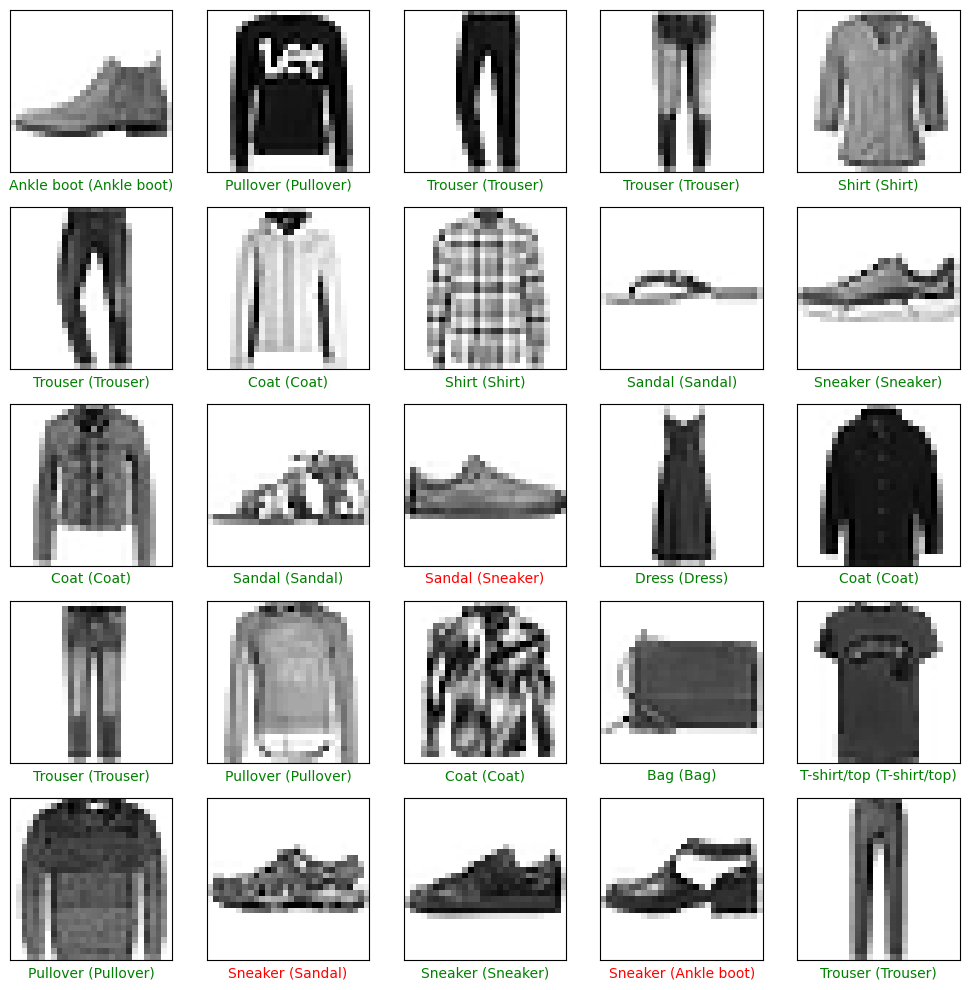

In [113]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red

plt.figure(figsize=(10, 10))

for i in range(25):
    # Display the original image
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    # Reshape the flattened image to its original dimensions (28x28)
    image = x_test[i].reshape(28, 28)
    
    # Display the image using the correct format (2D array)
    plt.imshow(image, cmap=plt.cm.binary)
    #plt.imshow(np.argmax(x_test[i]), cmap=plt.cm.binary)
    
    predicted_label = np.argmax(y_pred_probs[i])
    #true_label = y_test[i]
    true_label = np.argmax(y_test[i])  # Convert one-hot encoded label to integer
    
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
        
    plt.xlabel('{} ({})'.format(class_names[predicted_label],
                               class_names[true_label]),
                                color = color)

plt.tight_layout()
plt.show()